In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

### Exploratory Analysis and Visualization

In [5]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
single_image = x_train[0]

In [8]:
single_image.shape

(32, 32, 3)

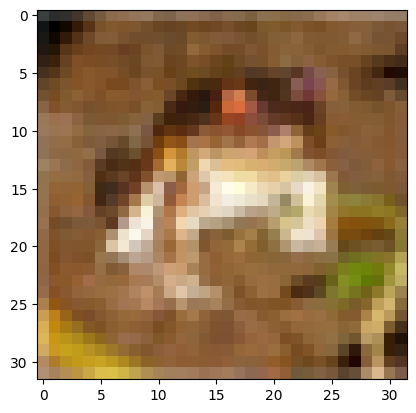

In [9]:
plt.imshow(single_image);

### Labeling

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train.shape

(50000, 1)

### Scaling and Reshaping

In [12]:
x_train.max()

np.uint8(255)

In [13]:
x_train.min()

np.uint8(0)

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

### Training a Custom Model

In [22]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [25]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3382 - loss: 2.1417 - val_accuracy: 0.1755 - val_loss: 2.9298
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5837 - loss: 1.1815 - val_accuracy: 0.6675 - val_loss: 0.9240
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6620 - loss: 0.9483 - val_accuracy: 0.7015 - val_loss: 0.8389
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7126 - loss: 0.8108 - val_accuracy: 0.7324 - val_loss: 0.7518
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7442 - loss: 0.7274 - val_accuracy: 0.7569 - val_loss: 0.6925
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7669 - loss: 0.6693 - val_accuracy: 0.7752 - val_loss: 0.6365
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7820 - loss: 0.6252 - val_accuracy: 0.7692 - val_loss: 0.6592
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8039 - loss: 0.5605 - val_ac

In [26]:
history = pd.DataFrame(model.history.history)

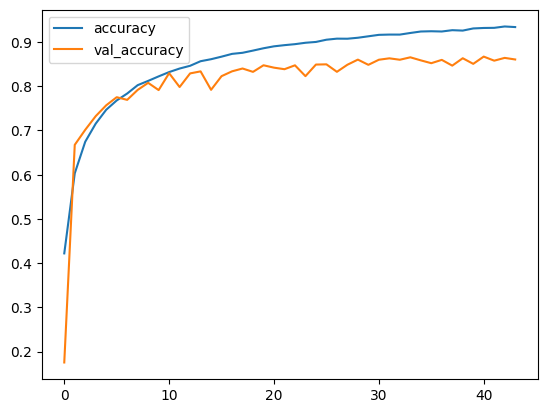

In [27]:
history[['accuracy', 'val_accuracy']].plot();

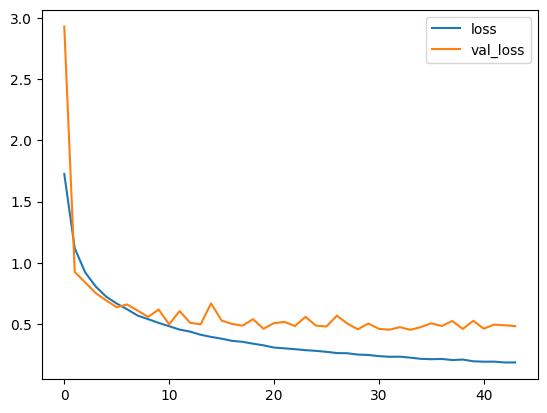

In [28]:
history[['loss', 'val_loss']].plot();

In [29]:
print(model.metrics_names)
print(model.evaluate(x_test, y_test, verbose=0))

['loss', 'compile_metrics']
[0.45215120911598206, 0.8654000163078308]


### Training a Prefab Model

In [34]:
base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(75, 75, 3)) # 75x75 recommended for EfficientNet

model = Sequential([
    Resizing(75, 75),
    base_model,
    GlobalAveragePooling2D(),
    
    Flatten(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [37]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 94ms/step - accuracy: 0.2151 - loss: 2.3936 - val_accuracy: 0.1000 - val_loss: 3.0819
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4404 - loss: 1.6285 - val_accuracy: 0.4671 - val_loss: 1.5321
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5242 - loss: 1.4149 - val_accuracy: 0.3983 - val_loss: 1.7863
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5854 - loss: 1.2002 - val_accuracy: 0.5837 - val_loss: 1.4783
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6508 - loss: 1.0042 - val_accuracy: 0.6184 - val_loss: 1.0732
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.6955 - loss: 0.8664 - val_accuracy: 0.6192 - val_loss: 1.1171
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7520 - loss: 0.7154 - val_accuracy: 0.6782 - val_loss: 0.9524
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7858 - loss: 0

In [38]:
history = pd.DataFrame(model.history.history)

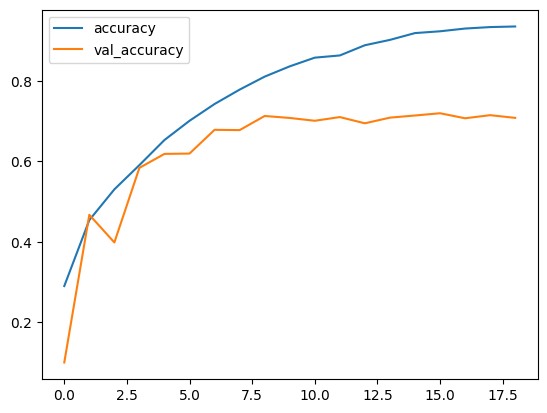

In [39]:
history[['accuracy', 'val_accuracy']].plot();

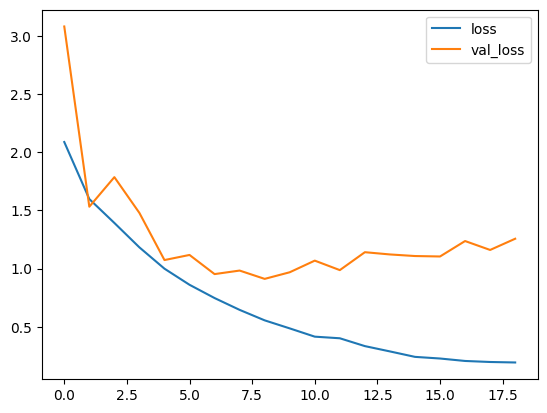

In [40]:
history[['loss', 'val_loss']].plot();

In [42]:
print(model.metrics_names)
print(model.evaluate(x_test, y_test, verbose=0))

['loss', 'compile_metrics']
[0.9112943410873413, 0.7127000093460083]


### Predict Classes

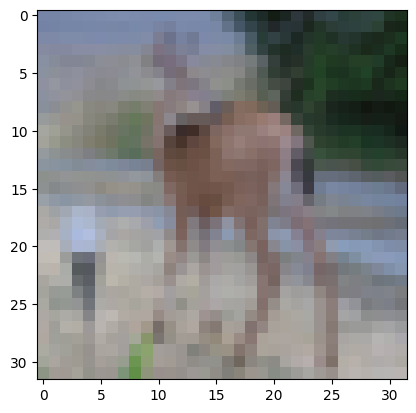

In [44]:
my_image = x_test[100]
plt.imshow(my_image);

In [46]:
prediction = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)), axis=1)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([4])